In [79]:
from numpy import pi, arange, log, exp, sqrt, sin, cos, linspace, amax
from matplotlib.pyplot import plot, show, xlim, ylim, xlabel, ylabel, title, legend
from scipy.integrate import quad, odeint
from scipy.optimize import fsolve, curve_fit
from scipy.interpolate import interp1d

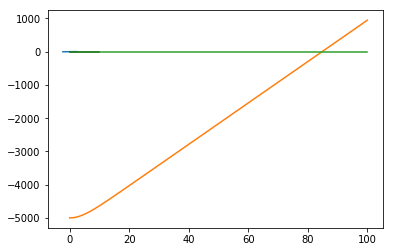

He hit's the ground after 84.8848848849 seconds


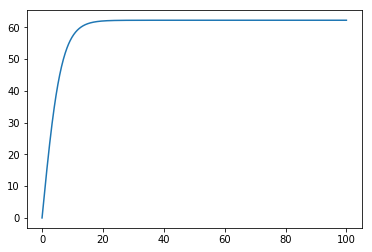

The terminal velocity reached is : 62.1972747768


In [80]:
g = 9.80665
cD = 0.2028
m = 80

def L(y, x):
    u,v = y
    U = v
    V = g - cD * v **2 / m
    return U,V

#Computation
t = linspace(0,100,1000)
y  = odeint(L,[-5000.,0.],t)
plot(t,y[:,0])
plot(t, [0]*1000)
show()
val = True
for n in range(len(t)):
    if y[n,0] > 0 and val:
        print ("He hit's the ground after " + str(t[n]) + " seconds")
        val = False


plot(t,y[:,1])
show()
print("The terminal velocity reached is : " + str(amax(y[:,1])))

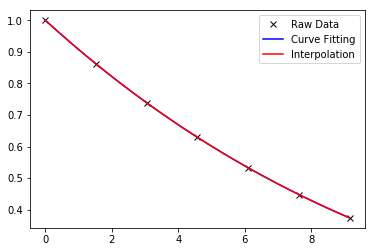

0.82177
0.66884
0.42897

using the cubic spline gives a value of 0.66884

the relative error is 0.173% for the cubic fit
and 0.173% for the cubic splines

the absolute error is 1.159e-03 for the cubic fit
and 1.157e-03 for the cubic splines


In [81]:
#Define Subroutines
def diff(f,x,h=0.00000000001):
    return (f(x+h)-f(x-h))/2/h
def cubicF(x,a,b,c,d):
    return a*x**3 + b*x**2 + c*x + d
#

#Define Raw data
x = [0.,1.525 ,3.050 ,4.575 ,6.10  ,7.625 ,9.150]
y = [1.,0.8617,0.7385,0.6292,0.5328,0.4481,0.3741]
#

x0 = np.arange(0,9.150,0.01)
interpolate  = interp1d(x,y, kind = 'cubic')
Coe, Cov = curve_fit(cubicF,x,y)

plt.plot(x,y,'kx',label ="Raw Data")
plt.plot(x0,cubicF(x0,Coe[0],Coe[1],Coe[2],Coe[3]),'b-',label ="Curve Fitting")
plt.plot(x0,interpolate(x0),'r-',label ="Interpolation")
plt.legend()
plt.show()

for h in [2,4,8]:
    print("{:.5f}".format(cubicF(h,Coe[0],Coe[1],Coe[2],Coe[3])))

print("")
print ("using the cubic spline gives a value of {:.5f}"
       .format(float(interpolate(4))))

print("")
print("the relative error is {:.3f}% for the cubic fit".format(abs(100*0.67/interpolate(4)-100)))
print("and {:.3f}% for the cubic splines".format(abs(100*0.67/cubicF(4,Coe[0],Coe[1],Coe[2],Coe[3])-100)))
print("")
print("the absolute error is {:.3e} for the cubic fit".format(abs(interpolate(4)-0.67)))
print("and {:.3e} for the cubic splines".format(abs(cubicF(4,Coe[0],Coe[1],Coe[2],Coe[3])-0.67)))

C:\Users\Chikan\Anaconda3.5.0.1\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


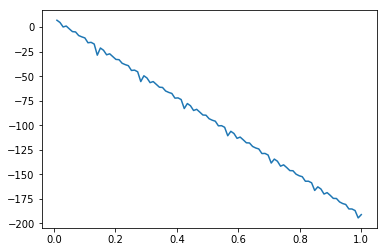

9.999999999999954


In [97]:
def i(x):
    return 100*exp(-x/0.01)*sin(2*x/0.01);
def E(x):
    return 0.5 * i(x)**2;

t =[];
Range = linspace(0.0,1.0,100);
plot(Range,log(i(Range)**2))
show()
E = quad(E,0,float('inf'))[0];
print(E)